In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Derrida plots
+ do async version
+ minimal homogeneity related to half funtional rule

In [125]:
import sys
sys.path.append("../code/")

In [126]:
from RBmodel.main import RBmodel

In [127]:
net = RBmodel(N=72, J=np.loadtxt("../data/EMT_interaction_matrix.txt"))

In [128]:
A = net.A

In [65]:
u1 = np.random.randint(0, 2, size=(100000, 72))*2-1
u2 = np.random.randint(0, 2, size=(100000, 72))*2-1

In [66]:
v1 = np.sign(u1@A)
v2 = np.sign(u2@A)

In [67]:
from scipy.spatial.distance import hamming

In [68]:
x, y = np.array(
    [[hamming(uu1, uu2), hamming(vv1, vv2)]
      for uu1, uu2, vv1, vv2 in zip(u1, u2, v1, v2)]
).T

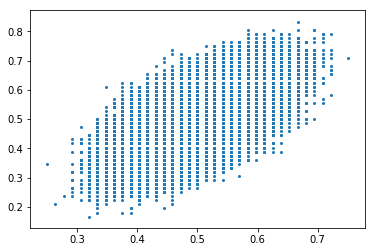

In [69]:
plt.scatter(x, y, s=4)

In [129]:
def get_twopairs(initial_distance=0.5, n_updates=1):
    u1 = np.random.choice([-1, 1], size=72)
    u2 = u1*np.random.choice([-1, 1], size=72, p=[initial_distance, 1-initial_distance])
    
    v1 = np.sign(u1@A)
    v2 = np.sign(u2@A)
    
    for _ in range(n_updates-1):
        v1 = np.sign(v1@A)
        v2 = np.sign(v2@A)
    
    
    return [hamming(u1, u2), hamming(v1, v2)]

In [131]:
x, y = np.array([get_twopairs(initial_distance=r, n_updates=1) for r in np.random.uniform(size=100000)]).T
averages = pd.Series(y).groupby(x).mean()
stds = pd.Series(y).groupby(x).std()

Text(0,0.5,'H_1')

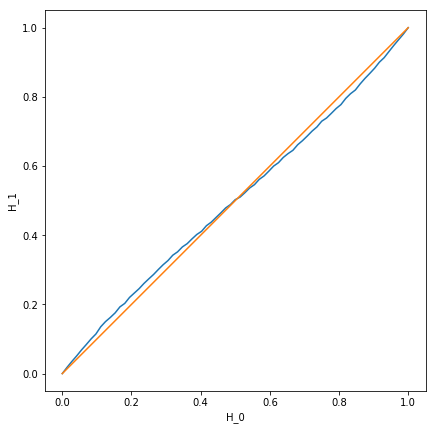

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.set_aspect(1)
ax.plot(averages)
ax.plot([0, 1], [0, 1])
ax.set_xlabel("H_0")
ax.set_ylabel("H_1")

In [110]:
net.runs(10000)

In [139]:
net.J

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])